In [1]:
# import the packages for this EDA section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import missingno as msno
import statsmodels.api as sm

In [2]:
# the data set contains 117 rows and 19 columns
df = pd.read_csv('Kerala-Rainfall-Historical.csv')
print(df.shape)
df.head()

(117, 19)


SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL    AUG  \
0      Kerala  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0  357.5   
1      Kerala  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0  315.8   
2      Kerala  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5  420.2   
3      Kerala  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5  351.8   
4      Kerala  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5  293.6   

     SEP    OCT    NOV    DEC  ANNUAL    JF    MAM    JJAS    OND  
0  197.7  266.9  350.8   48.4  3248.6  73.4  386.2  2122.8  666.1  
1  491.6  358.4  158.3  121.5  3326.6   9.3  275.7  2403.4  638.2  
2  341.8  354.1  157.0   59.0  3271.2  21.7  336.3  2343.0  570.1  
3  222.7  328.1   33.9    3.3  3129.7  26.7  339.4  2398.2  365.3  
4  217.2  383.5   74.4    0.2  2741.6  23.4  378.5  1881.5  458.1

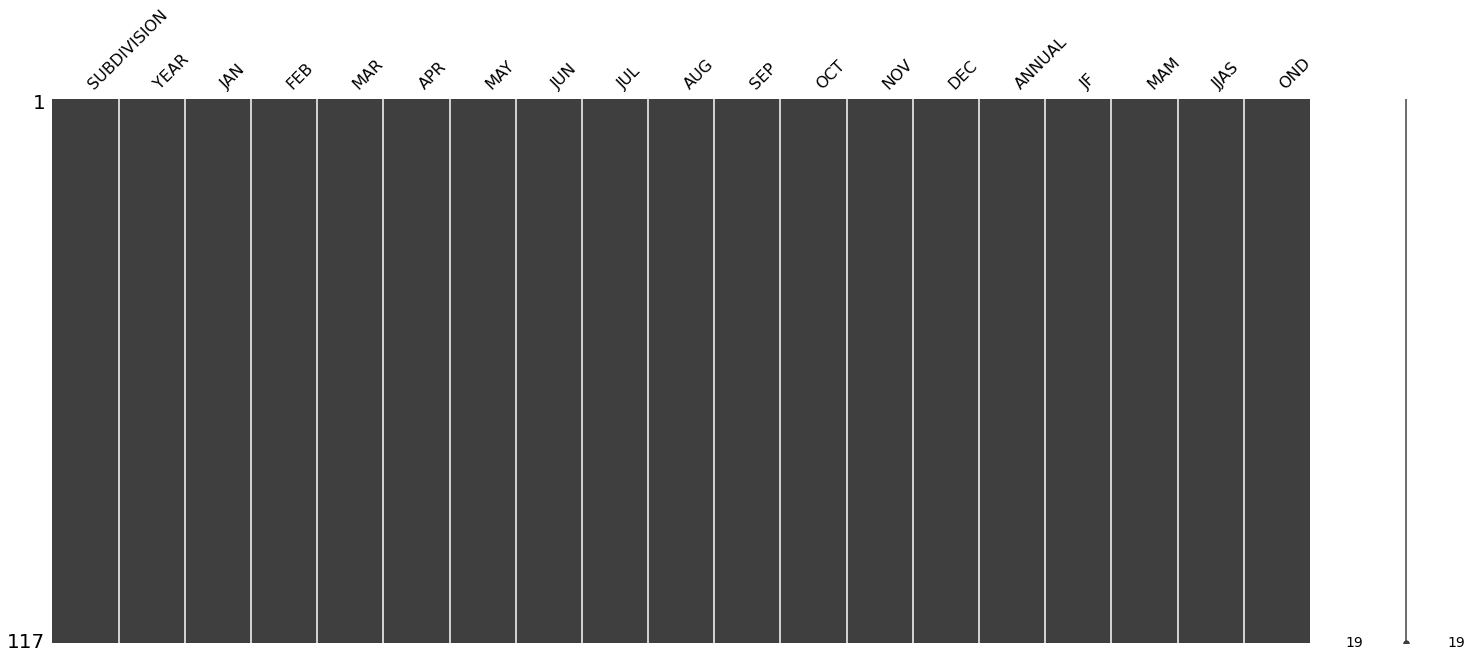

In [3]:
# review whether there is a missing value
msno.matrix(df)
plt.show()

In [4]:
# prepare dataframes for plots
df_month = df[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
df_season = df[['YEAR', 'ANNUAL', 'JF', 'MAM', 'JJAS', 'OND']]

In [5]:
bar_ann = round(df_season['ANNUAL'].mean(), 2)
bar_jf = round(df_season['JF'].mean(), 2)
bar_mam = round(df_season['MAM'].mean(), 2)
bar_jjas = round(df_season['JJAS'].mean(), 2)
bar_ond = round(df_season['OND'].mean(), 2)

x = ['Annual', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
y = [bar_ann, bar_jf, bar_mam, bar_jjas, bar_ond]

fig = go.Figure(data=[go.Bar(x=x, y=y, text=y, textposition='auto',
            hovertext=['Average Polarity', 'Average Polarity', 'Average Polarity', 'Average Polarity'])])

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text="Average Precipitation in Different Seasons", title_x=0.5)
fig.update_xaxes(
        title_text = "Seasons",
        title_font = {"size": 16},
        title_standoff = 12)
fig.update_yaxes(
        title_text = "Average Precipitation (mms)",
        title_font = {"size": 16},
        title_standoff = 12)
fig.show()

In [1]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=df_month['JAN'],
    name="Jan",
    jitter=0.4,
    pointpos=-1.6,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=df_month['FEB'],
    name="Feb",
    jitter=0.4,
    pointpos=-1.6,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=df_month['MAR'],
    name="Mar",
    jitter=0.4,
    pointpos=-1.6,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=df_month['APR'],
    name="Apr",
    jitter=0.4,
    pointpos=-1.6,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=df_month['MAY'],
    name="May",
    jitter=0.4,
    pointpos=-1.6,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=df_month['JUN'],
    name="Jun",
    jitter=0.4,
    pointpos=-1.6,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=df_month['JUL'],
    name="Jul",
    jitter=0.4,
    pointpos=-1.6,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=df_month['AUG'],
    name="Aug",
    jitter=0.4,
    pointpos=-1.6,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=df_month['SEP'],
    name="Sep",
    jitter=0.4,
    pointpos=-1.6,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=df_month['OCT'],
    name="Oct",
    jitter=0.4,
    pointpos=-1.6,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=df_month['NOV'],
    name="Nov",
    jitter=0.4,
    pointpos=-1.6,
    boxpoints='all'
))

fig.add_trace(go.Box(
    y=df_month['DEC'],
    name="Dec",
    jitter=0.4,
    pointpos=-1.6,
    boxpoints='all'

))
fig.update_xaxes(
        title_text = "Month",
        title_font = {"size": 16},
        title_standoff = 12)
fig.update_yaxes(
        title_text = "Precipitation (mms)",
        title_font = {"size": 16},
        title_standoff = 12)
fig.update_layout(title_text="Monthly Precipitation", title_x=0.5)
fig.show()

NameError: name 'go' is not defined

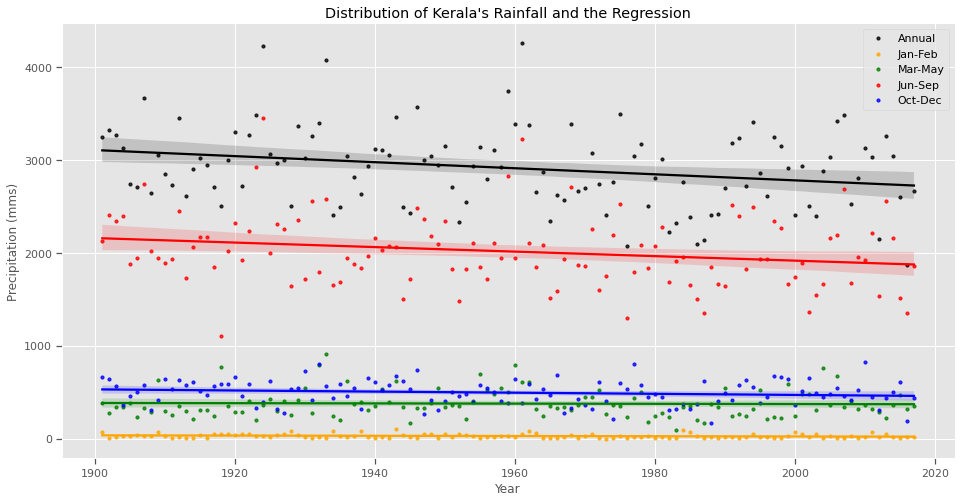

In [7]:
sns.set_context("notebook")
plt.style.use('ggplot') 
plt.subplots(figsize=(16, 8))
g1=sns.regplot(data=df_season, x='YEAR', y='ANNUAL', order=1, ci=95, label='Annual', 
               marker='o', scatter_kws={'s':10}, color='black')
g2=sns.regplot(data=df_season, x='YEAR', y='JF', order=1, ci=95, label='Jan-Feb', 
               marker='o', scatter_kws={'s':10}, color='orange')
g3=sns.regplot(data=df_season, x='YEAR', y='MAM', order=1, ci=95, label='Mar-May', 
               marker='o', scatter_kws={'s':10}, color='green')
g4=sns.regplot(data=df_season, x='YEAR', y='JJAS', order=1, ci=95, label='Jun-Sep', 
               marker='o', scatter_kws={'s':10}, color='red')
g5=sns.regplot(data=df_season, x='YEAR', y='OND', order=1, ci=95, label='Oct-Dec', 
               marker='o', scatter_kws={'s':10}, color='blue')
g1.set_title("Distribution of Kerala's Rainfall and the Regression", y=1)
g1.set(xlabel='Year', ylabel='Precipitation (mms)')
plt.xticks(rotation=0)
plt.legend()
sns.set_context("paper")
plt.show()

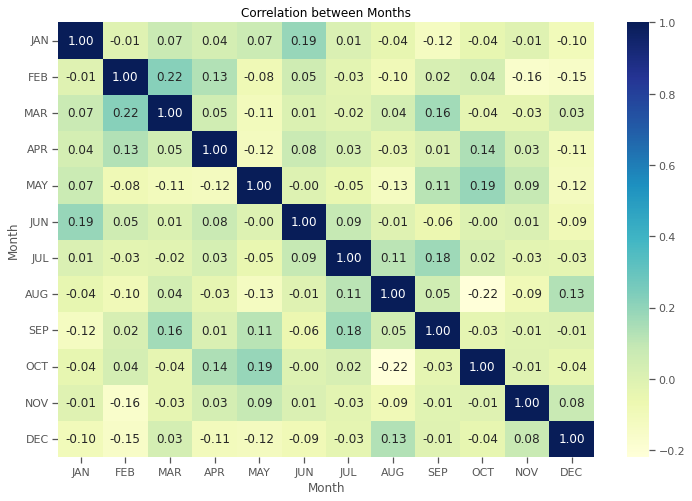

In [8]:
corr = df_month.drop('YEAR', axis=1).corr()

sns.set_context("notebook")
plt.subplots(figsize=(12, 8))
g1 = sns.heatmap(corr, cmap = 'YlGnBu', annot=True, fmt='.2f')
g1.set_title("Correlation between Months", y=1)
plt.xlabel('Month')
plt.ylabel('Month')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

In [9]:
data = df.copy(deep=True)

df_trend = pd.melt(data, id_vars = ['YEAR'], 
                   value_vars = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 
                                 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC'], 
                   var_name='month', value_name='mms')
print(df_trend.shape)
df_trend.head()

(1404, 3)


YEAR month   mms
0  1901   JAN  28.7
1  1902   JAN   6.7
2  1903   JAN   3.2
3  1904   JAN  23.7
4  1905   JAN   1.2

In [10]:
df_trend['date'] = df_trend['YEAR'].astype('str') + '-' + df_trend['month'] + '-01'
df_trend['date']= pd.to_datetime(df_trend['date'])
df_sorted = df_trend.sort_values('date')

df_sorted = df_sorted.reset_index()
df_sorted = df_sorted.drop('index', axis=1)
df_sorted['month_no'] = df_sorted['date'].dt.strftime('%m')
month_int = df_sorted.loc[:, 'month_no'].astype('int')
df_sorted = df_sorted.assign(month_no = month_int)

annual_list, jf_list, mam_list, jjas_list, ond_list = [], [], [], [], []

for year in range(1901, 2018):
    ann = df.loc[df['YEAR']==year, 'ANNUAL']
    jf = df.loc[df['YEAR']==year, 'JF']
    mam = df.loc[df['YEAR']==year, 'MAM']
    jjas = df.loc[df['YEAR']==year, 'JJAS']
    ond = df.loc[df['YEAR']==year, 'OND']
    for year_loop in range(12):
        annual_list.append(float(ann))
        jf_list.append(float(jf))
        mam_list.append(float(mam))
        jjas_list.append(float(jjas))
        ond_list.append(float(ond))

df_sorted = df_sorted.assign(annual=annual_list)
df_sorted = df_sorted.assign(jf=jf_list)
df_sorted = df_sorted.assign(mam=mam_list)
df_sorted = df_sorted.assign(jjas=jjas_list)
df_sorted = df_sorted.assign(ond=ond_list)
df_sorted

YEAR month    mms       date  month_no  annual    jf    mam    jjas  \
0     1901   JAN   28.7 1901-01-01         1  3248.6  73.4  386.2  2122.8   
1     1901   FEB   44.7 1901-02-01         2  3248.6  73.4  386.2  2122.8   
2     1901   MAR   51.6 1901-03-01         3  3248.6  73.4  386.2  2122.8   
3     1901   APR  160.0 1901-04-01         4  3248.6  73.4  386.2  2122.8   
4     1901   MAY  174.7 1901-05-01         5  3248.6  73.4  386.2  2122.8   
...    ...   ...    ...        ...       ...     ...   ...    ...     ...   
1399  2017   AUG  462.6 2017-08-01         8  2664.9  13.0  353.9  1856.5   
1400  2017   SEP  435.5 2017-09-01         9  2664.9  13.0  353.9  1856.5   
1401  2017   OCT  228.0 2017-10-01        10  2664.9  13.0  353.9  1856.5   
1402  2017   NOV  152.1 2017-11-01        11  2664.9  13.0  353.9  1856.5   
1403  2017   DEC   61.4 2017-12-01        12  2664.9  13.0  353.9  1856.5   

        ond  
0     666.1  
1     666.1  
2     666.1  
3     666.1  
4     666.1  
...     ...  
1399  441.5  
1400  441.5  
1401  441.5  
1402  441.5  
1403  441.5  

[1404 rows x 10 columns]

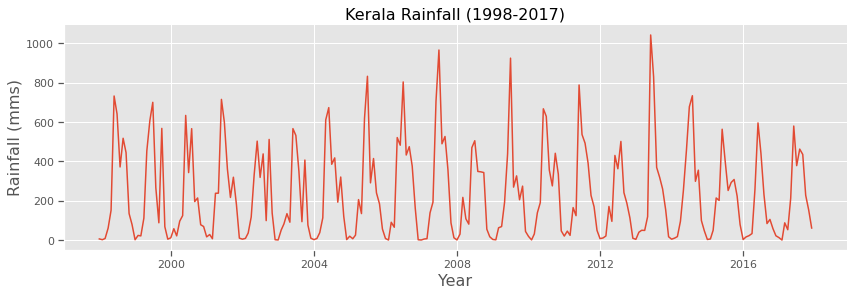

In [11]:
sns.relplot(data=df_sorted[-240:], x='date', y='mms', kind='line', height=4, aspect=3)
plt.title("Kerala Rainfall (1998-2017)", fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Rainfall (mms)', fontsize=16)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

In [12]:
# get 12 month moving average numbers
for index in range(len(df_sorted)-11):
    df_sorted.loc[index+11, 'mov_avg'] = df_sorted[index:index+12]['mms'].mean()
df_sorted.head(16)

YEAR month    mms       date  month_no  annual    jf    mam    jjas  \
0   1901   JAN   28.7 1901-01-01         1  3248.6  73.4  386.2  2122.8   
1   1901   FEB   44.7 1901-02-01         2  3248.6  73.4  386.2  2122.8   
2   1901   MAR   51.6 1901-03-01         3  3248.6  73.4  386.2  2122.8   
3   1901   APR  160.0 1901-04-01         4  3248.6  73.4  386.2  2122.8   
4   1901   MAY  174.7 1901-05-01         5  3248.6  73.4  386.2  2122.8   
5   1901   JUN  824.6 1901-06-01         6  3248.6  73.4  386.2  2122.8   
6   1901   JUL  743.0 1901-07-01         7  3248.6  73.4  386.2  2122.8   
7   1901   AUG  357.5 1901-08-01         8  3248.6  73.4  386.2  2122.8   
8   1901   SEP  197.7 1901-09-01         9  3248.6  73.4  386.2  2122.8   
9   1901   OCT  266.9 1901-10-01        10  3248.6  73.4  386.2  2122.8   
10  1901   NOV  350.8 1901-11-01        11  3248.6  73.4  386.2  2122.8   
11  1901   DEC   48.4 1901-12-01        12  3248.6  73.4  386.2  2122.8   
12  1902   JAN    6.7 1902-01-01         1  3326.6   9.3  275.7  2403.4   
13  1902   FEB    2.6 1902-02-01         2  3326.6   9.3  275.7  2403.4   
14  1902   MAR   57.3 1902-03-01         3  3326.6   9.3  275.7  2403.4   
15  1902   APR   83.9 1902-04-01         4  3326.6   9.3  275.7  2403.4   

      ond     mov_avg  
0   666.1         NaN  
1   666.1         NaN  
2   666.1         NaN  
3   666.1         NaN  
4   666.1         NaN  
5   666.1         NaN  
6   666.1         NaN  
7   666.1         NaN  
8   666.1         NaN  
9   666.1         NaN  
10  666.1         NaN  
11  666.1  270.716667  
12  638.2  268.883333  
13  638.2  265.375000  
14  638.2  265.850000  
15  638.2  259.508333

In [13]:
# calculate the seasonal factors for every month
df_sorted['ratio_ma'] = df_sorted['mms'] / df_sorted['mov_avg']
df_sorted

YEAR month    mms       date  month_no  annual    jf    mam    jjas  \
0     1901   JAN   28.7 1901-01-01         1  3248.6  73.4  386.2  2122.8   
1     1901   FEB   44.7 1901-02-01         2  3248.6  73.4  386.2  2122.8   
2     1901   MAR   51.6 1901-03-01         3  3248.6  73.4  386.2  2122.8   
3     1901   APR  160.0 1901-04-01         4  3248.6  73.4  386.2  2122.8   
4     1901   MAY  174.7 1901-05-01         5  3248.6  73.4  386.2  2122.8   
...    ...   ...    ...        ...       ...     ...   ...    ...     ...   
1399  2017   AUG  462.6 2017-08-01         8  2664.9  13.0  353.9  1856.5   
1400  2017   SEP  435.5 2017-09-01         9  2664.9  13.0  353.9  1856.5   
1401  2017   OCT  228.0 2017-10-01        10  2664.9  13.0  353.9  1856.5   
1402  2017   NOV  152.1 2017-11-01        11  2664.9  13.0  353.9  1856.5   
1403  2017   DEC   61.4 2017-12-01        12  2664.9  13.0  353.9  1856.5   

        ond     mov_avg  ratio_ma  
0     666.1         NaN       NaN  
1     666.1         NaN       NaN  
2     666.1         NaN       NaN  
3     666.1         NaN       NaN  
4     666.1         NaN       NaN  
...     ...         ...       ...  
1399  441.5  171.408333  2.698819  
1400  441.5  200.691667  2.169995  
1401  441.5  210.933333  1.080910  
1402  441.5  218.783333  0.695208  
1403  441.5  222.066667  0.276494  

[1404 rows x 12 columns]

In [14]:
# get the average seasonal factors to fit back into the months
for month in range(12):
    rate_avg = df_sorted.loc[df_sorted['month_no'].astype('int') == month+1, 'ratio_ma'].mean()
    df_sorted.loc[df_sorted['month_no'].astype('int') == month+1, 'rate'] = rate_avg
df_sorted

YEAR month    mms       date  month_no  annual    jf    mam    jjas  \
0     1901   JAN   28.7 1901-01-01         1  3248.6  73.4  386.2  2122.8   
1     1901   FEB   44.7 1901-02-01         2  3248.6  73.4  386.2  2122.8   
2     1901   MAR   51.6 1901-03-01         3  3248.6  73.4  386.2  2122.8   
3     1901   APR  160.0 1901-04-01         4  3248.6  73.4  386.2  2122.8   
4     1901   MAY  174.7 1901-05-01         5  3248.6  73.4  386.2  2122.8   
...    ...   ...    ...        ...       ...     ...   ...    ...     ...   
1399  2017   AUG  462.6 2017-08-01         8  2664.9  13.0  353.9  1856.5   
1400  2017   SEP  435.5 2017-09-01         9  2664.9  13.0  353.9  1856.5   
1401  2017   OCT  228.0 2017-10-01        10  2664.9  13.0  353.9  1856.5   
1402  2017   NOV  152.1 2017-11-01        11  2664.9  13.0  353.9  1856.5   
1403  2017   DEC   61.4 2017-12-01        12  2664.9  13.0  353.9  1856.5   

        ond     mov_avg  ratio_ma      rate  
0     666.1         NaN       NaN  0.049417  
1     666.1         NaN       NaN  0.062845  
2     666.1         NaN       NaN  0.154157  
3     666.1         NaN       NaN  0.453575  
4     666.1         NaN       NaN  0.930244  
...     ...         ...       ...       ...  
1399  441.5  171.408333  2.698819  1.738357  
1400  441.5  200.691667  2.169995  1.009300  
1401  441.5  210.933333  1.080910  1.216487  
1402  441.5  218.783333  0.695208  0.669488  
1403  441.5  222.066667  0.276494  0.167837  

[1404 rows x 13 columns]

In [15]:
# use the average factors to get deseasonalized numbers
df_sorted['deseasonal'] = df_sorted['mms'] / df_sorted['rate']
df_sorted.head(16)

YEAR month    mms       date  month_no  annual    jf    mam    jjas  \
0   1901   JAN   28.7 1901-01-01         1  3248.6  73.4  386.2  2122.8   
1   1901   FEB   44.7 1901-02-01         2  3248.6  73.4  386.2  2122.8   
2   1901   MAR   51.6 1901-03-01         3  3248.6  73.4  386.2  2122.8   
3   1901   APR  160.0 1901-04-01         4  3248.6  73.4  386.2  2122.8   
4   1901   MAY  174.7 1901-05-01         5  3248.6  73.4  386.2  2122.8   
5   1901   JUN  824.6 1901-06-01         6  3248.6  73.4  386.2  2122.8   
6   1901   JUL  743.0 1901-07-01         7  3248.6  73.4  386.2  2122.8   
7   1901   AUG  357.5 1901-08-01         8  3248.6  73.4  386.2  2122.8   
8   1901   SEP  197.7 1901-09-01         9  3248.6  73.4  386.2  2122.8   
9   1901   OCT  266.9 1901-10-01        10  3248.6  73.4  386.2  2122.8   
10  1901   NOV  350.8 1901-11-01        11  3248.6  73.4  386.2  2122.8   
11  1901   DEC   48.4 1901-12-01        12  3248.6  73.4  386.2  2122.8   
12  1902   JAN    6.7 1902-01-01         1  3326.6   9.3  275.7  2403.4   
13  1902   FEB    2.6 1902-02-01         2  3326.6   9.3  275.7  2403.4   
14  1902   MAR   57.3 1902-03-01         3  3326.6   9.3  275.7  2403.4   
15  1902   APR   83.9 1902-04-01         4  3326.6   9.3  275.7  2403.4   

      ond     mov_avg  ratio_ma      rate  deseasonal  
0   666.1         NaN       NaN  0.049417  580.776307  
1   666.1         NaN       NaN  0.062845  711.271572  
2   666.1         NaN       NaN  0.154157  334.723229  
3   666.1         NaN       NaN  0.453575  352.753471  
4   666.1         NaN       NaN  0.930244  187.800126  
5   666.1         NaN       NaN  2.694557  306.024385  
6   666.1         NaN       NaN  2.847874  260.896381  
7   666.1         NaN       NaN  1.738357  205.653905  
8   666.1         NaN       NaN  1.009300  195.878426  
9   666.1         NaN       NaN  1.216487  219.402349  
10  666.1         NaN       NaN  0.669488  523.982727  
11  666.1  270.716667  0.178785  0.167837  288.375561  
12  638.2  268.883333  0.024918  0.049417  135.581925  
13  638.2  265.375000  0.009797  0.062845   41.371501  
14  638.2  265.850000  0.215535  0.154157  371.698470  
15  638.2  259.508333  0.323304  0.453575  184.975101

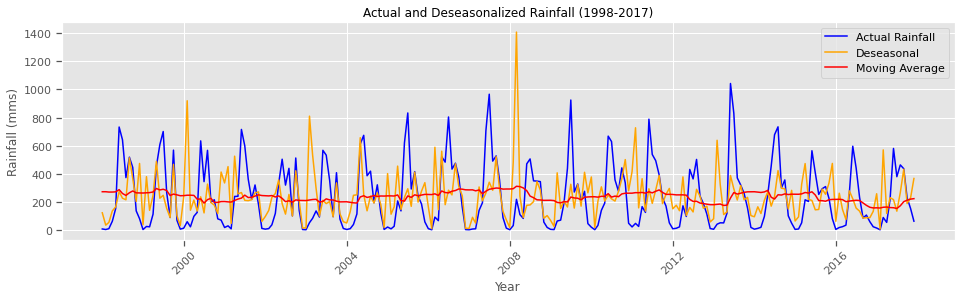

In [16]:
sns.set_context("notebook")
plt.subplots(figsize=(16, 4))
g1=sns.lineplot(data=df_sorted[-240:], x='date', y='mms', label='Actual Rainfall', color='blue')
g2=sns.lineplot(data=df_sorted[-240:], x='date', y='deseasonal', label='Deseasonal', color='orange')
g3=sns.lineplot(data=df_sorted[-240:], x='date', y='mov_avg', label='Moving Average', color='red')
g1.set_title('Actual and Deseasonalized Rainfall (1998-2017)', y=1)
g1.set(xlabel='Year', ylabel='Rainfall (mms)')
plt.xticks(rotation=44)
plt.legend()
plt.show()

In [17]:
df_sorted['period'] = df_sorted.index + 1

X_train = df_sorted['period']
y_train = df_sorted['mms']
X_train = sm.add_constant(X_train)
olsreg = sm.OLS(y_train, X_train)
olsreg = olsreg.fit()
print('Original Rainfall')
print('Intercept: {}, Coefficient: {}'.format(olsreg.params[0], olsreg.params[1]))
print('R-Squared:', olsreg.rsquared)

Original Rainfall
Intercept: 257.92735438711924, Coefficient: -0.021455734565719836
R-Squared: 0.0011508387916198126


In [18]:
X_train = df_sorted['period']
y_train = df_sorted['deseasonal']
X_train = sm.add_constant(X_train)
olsreg = sm.OLS(y_train, X_train)
olsreg = olsreg.fit()
print('Deseasonalized Rainfall')
print('Intercept: {}, Coefficient: {}'.format(olsreg.params[0], olsreg.params[1]))
print('R-Squared:', olsreg.rsquared)
print(olsreg.summary())

Deseasonalized Rainfall
Intercept: 264.4360132473951, Coefficient: -0.0307920960935075
R-Squared: 0.005512372162586376
                            OLS Regression Results                            
Dep. Variable:             deseasonal   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     7.771
Date:                Sun, 28 Aug 2022   Prob (F-statistic):            0.00538
Time:                        17:50:52   Log-Likelihood:                -9183.1
No. Observations:                1404   AIC:                         1.837e+04
Df Residuals:                    1402   BIC:                         1.838e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------

In [19]:
def get_mov_avg(df, column, period, add_column):
    df[add_column] = df[column].rolling(period).mean()
    return df

season_list = ['JF', 'MAM', 'JJAS', 'OND']
df_season = pd.melt(data, id_vars = ['YEAR'], 
                   value_vars = season_list, 
                   var_name='season', value_name='q_mms')

for i in range(len(season_list)):
    df_season.loc[df_season['season']==season_list[i], 'season_no'] = i+1

df_season['season_no'] = df_season['season_no'].astype('int').astype('str')
df_season['year_s'] = df_season['YEAR'].astype('str')+'-'+'s'+df_season['season_no']
season_sorted = df_season.sort_values('year_s').reset_index(drop=True)

get_mov_avg(season_sorted, 'q_mms', 4, 'mov_avg')

season_sorted['ratio_s'] = season_sorted['q_mms'] / season_sorted['mov_avg']

for season in range(4):
    rate_avg = season_sorted.loc[season_sorted['season_no'].astype('int') == season+1, 'ratio_s'].mean()
    season_sorted.loc[season_sorted['season_no'].astype('int') == season+1, 'rate'] = rate_avg

season_sorted['deseasonal'] = season_sorted['q_mms'] / season_sorted['rate']

season_sorted['period'] = season_sorted.index+1

season_sorted

YEAR season   q_mms season_no   year_s  mov_avg   ratio_s      rate  \
0    1901     JF    73.4         1  1901-s1      NaN       NaN  0.037439   
1    1901    MAM   386.2         2  1901-s2      NaN       NaN  0.513478   
2    1901   JJAS  2122.8         3  1901-s3      NaN       NaN  2.759032   
3    1901    OND   666.1         4  1901-s4  812.125  0.820194  0.685043   
4    1902     JF     9.3         1  1902-s1  796.100  0.011682  0.037439   
..    ...    ...     ...       ...      ...      ...       ...       ...   
463  2016    OND   185.0         4  2016-s4  467.700  0.395553  0.685043   
464  2017     JF    13.0         1  2017-s1  466.125  0.027890  0.037439   
465  2017    MAM   353.9         2  2017-s2  476.050  0.743409  0.513478   
466  2017   JJAS  1856.5         3  2017-s3  602.100  3.083375  2.759032   
467  2017    OND   441.5         4  2017-s4  666.225  0.662689  0.685043   

      deseasonal  period  
0    1960.515942       1  
1     752.125969       2  
2     769.400333       3  
3     972.348395       4  
4     248.403246       5  
..           ...     ...  
463   270.056227     464  
464   347.230344     465  
465   689.221596     466  
466   672.880968     467  
467   644.485537     468  

[468 rows x 10 columns]

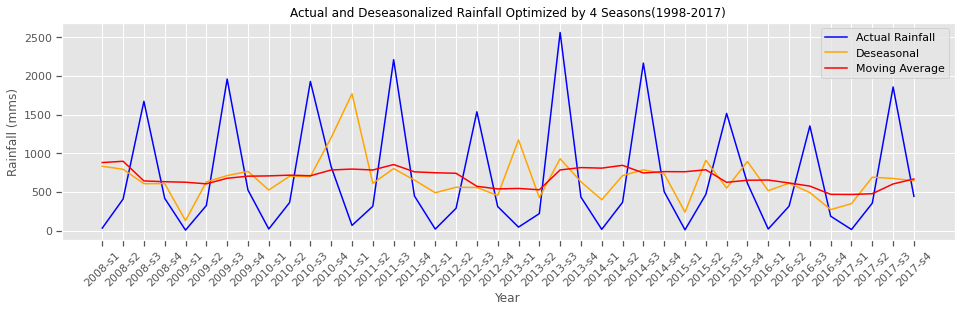

In [20]:
sns.set_context("notebook")
plt.subplots(figsize=(16, 4))
g1=sns.lineplot(data=season_sorted[-40:], x='year_s', y='q_mms', ci=None, label='Actual Rainfall', color='blue')
g2=sns.lineplot(data=season_sorted[-40:], x='year_s', y='deseasonal', ci=95, label='Deseasonal', color='orange')
g3=sns.lineplot(data=season_sorted[-40:], x='year_s', y='mov_avg', label='Moving Average', color='red')
g1.set_title('Actual and Deseasonalized Rainfall Optimized by 4 Seasons(1998-2017)', y=1)
g1.set(xlabel='Year', ylabel='Rainfall (mms)')
plt.xticks(rotation=44)
plt.legend()
sns.set_context("paper")
plt.show()

In [21]:
X_train = season_sorted['period']
y_train = season_sorted['q_mms']
X_train = sm.add_constant(X_train)
olsreg = sm.OLS(y_train, X_train)
olsreg = olsreg.fit()
print('Original Rainfall Optimized by 4 Seasons')
print('Intercept: {}, Coefficient: {}'.format(olsreg.params[0], olsreg.params[1]))
print('R-Squared:', olsreg.rsquared)

Original Rainfall Optimized by 4 Seasons
Intercept: 771.4829059829059, Coefficient: -0.18305177409655068
R-Squared: 0.0009721950560945825


In [22]:
X_train = season_sorted['period']
y_train = season_sorted['deseasonal']
X_train = sm.add_constant(X_train)
olsreg = sm.OLS(y_train, X_train)
olsreg = olsreg.fit()
print('Deseasonized Rainfall Optimized by 4 Seasons')
print('Intercept: {}, Coefficient: {}'.format(olsreg.params[0], olsreg.params[1]))
print('R-Squared:', olsreg.rsquared)
print(olsreg.summary())

Deseasonized Rainfall Optimized by 4 Seasons
Intercept: 805.9389988267628, Coefficient: -0.3224528334109955
R-Squared: 0.015479852780417303
                            OLS Regression Results                            
Dep. Variable:             deseasonal   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     7.327
Date:                Sun, 28 Aug 2022   Prob (F-statistic):            0.00704
Time:                        17:52:01   Log-Likelihood:                -3402.1
No. Observations:                 468   AIC:                             6808.
Df Residuals:                     466   BIC:                             6817.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

In [23]:
df_last = df_sorted[df_sorted['YEAR']!=1901]

annual_list_last, jf_list_last, mam_list_last, jjas_list_last, ond_list_last = [], [], [], [], []

for year in range(1901, 2017):
    ann_last = df.loc[df['YEAR']==year, 'ANNUAL']
    jf_last = df.loc[df['YEAR']==year, 'JF']
    mam_last = df.loc[df['YEAR']==year, 'MAM']
    jjas_last = df.loc[df['YEAR']==year, 'JJAS']
    ond_last = df.loc[df['YEAR']==year, 'OND']
    for year_loop in range(12):
        annual_list_last.append(float(ann_last))
        jf_list_last.append(float(jf_last))
        mam_list_last.append(float(mam_last))
        jjas_list_last.append(float(jjas_last))
        ond_list_last.append(float(ond_last))

df_last = df_last.assign(last_annual=annual_list_last)
df_last = df_last.assign(last_jf=jf_list_last)
df_last = df_last.assign(last_mam=mam_list_last)
df_last = df_last.assign(last_jjas=jjas_list_last)
df_last = df_last.assign(last_ond=ond_list_last)

df_ml = df_last[['YEAR', 'mms', 'month_no', 'mov_avg', 'last_annual', 
                 'last_jf', 'last_mam', 'last_jjas', 'last_ond']]
df_ml = df_ml.reset_index(drop=True)
df_ml

YEAR    mms  month_no     mov_avg  last_annual  last_jf  last_mam  \
0     1902    6.7         1  268.883333       3248.6     73.4     386.2   
1     1902    2.6         2  265.375000       3248.6     73.4     386.2   
2     1902   57.3         3  265.850000       3248.6     73.4     386.2   
3     1902   83.9         4  259.508333       3248.6     73.4     386.2   
4     1902  134.5         5  256.158333       3248.6     73.4     386.2   
...    ...    ...       ...         ...          ...      ...       ...   
1387  2017  462.6         8  171.408333       1870.9     19.3     314.2   
1388  2017  435.5         9  200.691667       1870.9     19.3     314.2   
1389  2017  228.0        10  210.933333       1870.9     19.3     314.2   
1390  2017  152.1        11  218.783333       1870.9     19.3     314.2   
1391  2017   61.4        12  222.066667       1870.9     19.3     314.2   

      last_jjas  last_ond  
0        2122.8     666.1  
1        2122.8     666.1  
2        2122.8     666.1  
3        2122.8     666.1  
4        2122.8     666.1  
...         ...       ...  
1387     1352.3     185.0  
1388     1352.3     185.0  
1389     1352.3     185.0  
1390     1352.3     185.0  
1391     1352.3     185.0  

[1392 rows x 9 columns]

In [24]:
# label the rainfall records into 4 ranges
df_ml['mms_level']=pd.qcut(df_ml['mms'].rank(method='first'), q=4, labels=range(1,5))
print('Level 4 - Above 25%: Above {} mms'.format(df_ml['mms'].quantile(q = 0.75)))
print('Level 3 - 75%-50%: {} - {} mms'.format(df_ml['mms'].quantile(q = 0.75), df_ml['mms'].quantile(q = 0.5)))
print('Level 2 - 50%-25%: {} - {} mms'.format(df_ml['mms'].quantile(q = 0.5), df_ml['mms'].quantile(q = 0.25)))
print('Level 1 - Below 25%: Below {} mms'.format(df_ml['mms'].quantile(q = 0.25)))
df_ml

Level 4 - Above 25%: Above 374.4 mms
Level 3 - 75%-50%: 374.4 - 152.55 mms
Level 2 - 50%-25%: 152.55 - 33.75 mms
Level 1 - Below 25%: Below 33.75 mms


YEAR    mms  month_no     mov_avg  last_annual  last_jf  last_mam  \
0     1902    6.7         1  268.883333       3248.6     73.4     386.2   
1     1902    2.6         2  265.375000       3248.6     73.4     386.2   
2     1902   57.3         3  265.850000       3248.6     73.4     386.2   
3     1902   83.9         4  259.508333       3248.6     73.4     386.2   
4     1902  134.5         5  256.158333       3248.6     73.4     386.2   
...    ...    ...       ...         ...          ...      ...       ...   
1387  2017  462.6         8  171.408333       1870.9     19.3     314.2   
1388  2017  435.5         9  200.691667       1870.9     19.3     314.2   
1389  2017  228.0        10  210.933333       1870.9     19.3     314.2   
1390  2017  152.1        11  218.783333       1870.9     19.3     314.2   
1391  2017   61.4        12  222.066667       1870.9     19.3     314.2   

      last_jjas  last_ond mms_level  
0        2122.8     666.1         1  
1        2122.8     666.1         1  
2        2122.8     666.1         2  
3        2122.8     666.1         2  
4        2122.8     666.1         2  
...         ...       ...       ...  
1387     1352.3     185.0         4  
1388     1352.3     185.0         4  
1389     1352.3     185.0         3  
1390     1352.3     185.0         2  
1391     1352.3     185.0         2  

[1392 rows x 10 columns]

In [25]:
# import machine learning packages
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb

In [26]:
def run_multiclass(model, X_train, y_train, X_test, y_test, verbose=True):
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    c_matrix = confusion_matrix(y_test, y_pred)
    c_report = classification_report(y_test, y_pred, digits=5)
    
    print(classification_report(y_test, y_pred, digits=5))
    
    return model, accuracy, c_matrix, c_report

In [28]:
X = df_ml.drop(['mms', 'mms_level'], axis=1)
y = df_ml['mms_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

# GaussianNB
print('GaussianNB:')
params_gnb = {'var_smoothing': 1e-09}
model_gnb = GaussianNB(**params_gnb)
model_gnb, accuracy_gnb, c_matrix_gnb, c_report_gnb = run_multiclass(model_gnb, X_train, y_train, X_test, y_test)

# Random Forest
print('Random Forest:')
params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 44}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, c_matrix_rf, c_report_rf = run_multiclass(model_rf, X_train, y_train, X_test, y_test)

# Logistic Regression
print('Logistic Regression:')
params_lr = {'penalty': 'l1', 'solver':'liblinear', 
             'random_state': 44}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, c_matrix_lr, c_report_lr = run_multiclass(model_lr, X_train, y_train, X_test, y_test)

# Decision Tree
print('Decision Tree:')
params_dt = {'max_depth': 16,
             'max_features': "sqrt", 'random_state': 44}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, c_matrix_dt, c_report_dt = run_multiclass(model_dt, X_train, y_train, X_test, y_test)

# LGBM
print('LGBM:')
params_lgb ={'colsample_bytree': 0.95, 'max_depth': 16, 
             'min_split_gain': 0.1, 'n_estimators': 200, 
             'num_leaves': 50, 'reg_alpha': 1.2, 
             'reg_lambda': 1.2, 'subsample': 0.95, 
             'subsample_freq': 20, 'random_state': 44}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, c_matrix_lgb, c_report_lgb = run_multiclass(model_lgb, X_train, y_train, X_test, y_test)



GaussianNB:
              precision    recall  f1-score   support

           1    0.67257   0.80000   0.73077        95
           2    0.47222   0.20238   0.28333        84
           3    0.53782   0.72727   0.61836        88
           4    0.81250   0.80247   0.80745        81

    accuracy                        0.63793       348
   macro avg    0.62378   0.63303   0.60998       348
weighted avg    0.62270   0.63793   0.61219       348

Random Forest:
              precision    recall  f1-score   support

           1    0.82927   0.71579   0.76836        95
           2    0.48193   0.47619   0.47904        84
           3    0.54255   0.57955   0.56044        88
           4    0.74157   0.81481   0.77647        81

    accuracy                        0.64655       348
   macro avg    0.64883   0.64659   0.64608       348
weighted avg    0.65251   0.64655   0.64784       348

Logistic Regression:
              precision    recall  f1-score   support

           1    0.58209   0

In [4]:
bar_x = ['GaussianNB', 'Random Forest', 'Logistic Regression', 
     'Decision Tree', 'LGBM'] 
bar_y = [accuracy_gnb, accuracy_rf, accuracy_lr, accuracy_dt, accuracy_lgb]
rounded_y = [round(num, 4) for num in bar_y]

fig = px.bar(x=bar_x, y=bar_y, text=rounded_y, title='Accuracy Comparison between Models',
             color=rounded_y, color_continuous_scale='sunsetdark',
             labels={'x':'Machine Learning Models', 'y':'Accuracy Score'}, height=500)
fig.update_layout(title_x=0.5)
fig.show()

NameError: name 'accuracy_gnb' is not defined

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

C

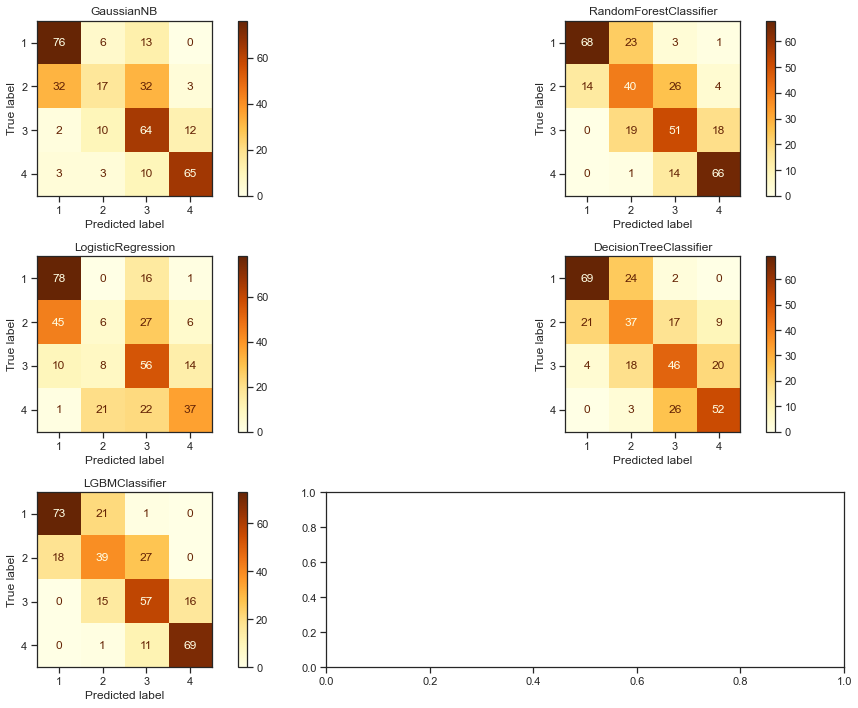

In [32]:
classifiers = [model_gnb, model_rf, model_lr, model_dt, model_lgb]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))

plt.style.use('seaborn-white') 
sns.set_context("notebook")
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='YlOrBr')
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

In [33]:
# calculate the false predictions that accurately forecast droughts and floods
model_list = [c_matrix_gnb, c_matrix_rf, c_matrix_lr, c_matrix_dt, c_matrix_lgb]

f_drought_list = []
f_flood_list = []
for matrix in model_list:
    f_to_drought = round(matrix[0, 1:4].sum() / matrix[:, 1:4].sum(), 2)
    f_to_flood = round(matrix[3, :3].sum() / matrix[:, :3].sum(), 2)
    f_drought_list.append(f_to_drought)
    f_flood_list.append(f_to_flood)

In [34]:
fig = go.Figure()
fig.add_trace(go.Bar(x=f_drought_list, y=bar_x, name='False Prediction of Droughts', 
                     marker_color='lightgrey', text=f_drought_list, 
                     textposition='auto', orientation='h'))
fig.add_trace(go.Bar(x=f_flood_list, y=bar_x, name='False Prediction of Floods', 
                     marker_color='lightsalmon', text=f_flood_list, 
                     textposition='auto', orientation='h'))
fig.update_layout(barmode='group', xaxis_tickangle=0)
fig.update_layout({'showlegend':True, 
                   'legend':{'x':0.7, 'y':0.94, 
                             'bgcolor':'rgb(246, 228, 129)'}})
fig.update_xaxes(
        title_text = "Machine Learning Models",
        title_font = {"size": 16},
        title_standoff = 12)
fig.update_yaxes(
        title_text = "False Prediction Rate",
        title_font = {"size": 16},
        title_standoff = 12)
fig.update_layout(title_text="False Prediction of Droughts and Floods (The Lower, The Better)", title_x=0.5, title_y=0.88)
fig.show()

In [35]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, RidgeCV

In [36]:
tscv = TimeSeriesSplit(n_splits=5)

df_month = df_sorted[['YEAR', 'month', 'mms', 'date', 'month_no']]
month_mms = df_month.set_index('date')[['mms']]
data = month_mms.copy(deep=True)
data.head()

mms
date             
1901-01-01   28.7
1901-02-01   44.7
1901-03-01   51.6
1901-04-01  160.0
1901-05-01  174.7

In [37]:
for i in range(1, 13):
    data["lag_{}".format(i)] = data['mms'].shift(i)
data

mms  lag_1  lag_2  lag_3  lag_4  lag_5  lag_6  lag_7  lag_8  \
date                                                                        
1901-01-01   28.7    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1901-02-01   44.7   28.7    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1901-03-01   51.6   44.7   28.7    NaN    NaN    NaN    NaN    NaN    NaN   
1901-04-01  160.0   51.6   44.7   28.7    NaN    NaN    NaN    NaN    NaN   
1901-05-01  174.7  160.0   51.6   44.7   28.7    NaN    NaN    NaN    NaN   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2017-08-01  462.6  378.5  579.8  213.3   52.8   87.8    0.3   12.7   22.0   
2017-09-01  435.5  462.6  378.5  579.8  213.3   52.8   87.8    0.3   12.7   
2017-10-01  228.0  435.5  462.6  378.5  579.8  213.3   52.8   87.8    0.3   
2017-11-01  152.1  228.0  435.5  462.6  378.5  579.8  213.3   52.8   87.8   
2017-12-01   61.4  152.1  228.0  435.5  462.6  378.5  579.8  213.3   52.8   

            lag_9  lag_10  lag_11  lag_12  
date                                       
1901-01-01    NaN     NaN     NaN     NaN  
1901-02-01    NaN     NaN     NaN     NaN  
1901-03-01    NaN     NaN     NaN     NaN  
1901-04-01    NaN     NaN     NaN     NaN  
1901-05-01    NaN     NaN     NaN     NaN  
...           ...     ...     ...     ...  
2017-08-01   57.9   105.1    84.1   231.0  
2017-09-01   22.0    57.9   105.1    84.1  
2017-10-01   12.7    22.0    57.9   105.1  
2017-11-01    0.3    12.7    22.0    57.9  
2017-12-01   87.8     0.3    12.7    22.0  

[1404 rows x 13 columns]

In [38]:
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    
    plt.style.use('fivethirtyeight')
    prediction = model.predict(X_test)
    df_pred = pd.DataFrame(prediction, index=y_test.index)
    df_pred = df_pred.rename(columns={0:'mms'})
    
    plt.figure(figsize=(15, 7))
    plt.plot(df_pred.index.astype('str'), df_pred['mms'], "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.2)
        plt.plot(upper, "r--", alpha=0.2)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    plt.legend(loc="best", prop={'size': 14})
    plt.xticks(fontsize=14, rotation=0)
    plt.yticks(fontsize=14)
    plt.xticks(np.arange(0, len(df_pred.index)+1, 12))
    plt.title('Prediction v.s. Actual Rainfall with Confidence Interval')
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):

    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.xticks(fontsize=14, rotation=0)
    plt.yticks(fontsize=14)
    plt.title('Coefficients of the Elements for The Model Prediction')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

In [39]:
data_label = data.copy(deep=True)
data_label["month"] = data_label.index.month
data_label["year"] = data_label.index.year

season_list=[]
for j in range(len(data_label)):
    if (data_label['month'][j]>=1) & (data_label['month'][j]<=2):
        season_list.append(1)
    elif (data_label['month'][j]>=3) & (data_label['month'][j]<=5):
        season_list.append(2)
    elif (data_label['month'][j]>=6) & (data_label['month'][j]<=9):
        season_list.append(3)
    else:
        season_list.append(4)
data_label = data_label.assign(season=season_list)
data_label

mms  lag_1  lag_2  lag_3  lag_4  lag_5  lag_6  lag_7  lag_8  \
date                                                                        
1901-01-01   28.7    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1901-02-01   44.7   28.7    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1901-03-01   51.6   44.7   28.7    NaN    NaN    NaN    NaN    NaN    NaN   
1901-04-01  160.0   51.6   44.7   28.7    NaN    NaN    NaN    NaN    NaN   
1901-05-01  174.7  160.0   51.6   44.7   28.7    NaN    NaN    NaN    NaN   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2017-08-01  462.6  378.5  579.8  213.3   52.8   87.8    0.3   12.7   22.0   
2017-09-01  435.5  462.6  378.5  579.8  213.3   52.8   87.8    0.3   12.7   
2017-10-01  228.0  435.5  462.6  378.5  579.8  213.3   52.8   87.8    0.3   
2017-11-01  152.1  228.0  435.5  462.6  378.5  579.8  213.3   52.8   87.8   
2017-12-01   61.4  152.1  228.0  435.5  462.6  378.5  579.8  213.3   52.8   

            lag_9  lag_10  lag_11  lag_12  month  year  season  
date                                                            
1901-01-01    NaN     NaN     NaN     NaN      1  1901       1  
1901-02-01    NaN     NaN     NaN     NaN      2  1901       1  
1901-03-01    NaN     NaN     NaN     NaN      3  1901       2  
1901-04-01    NaN     NaN     NaN     NaN      4  1901       2  
1901-05-01    NaN     NaN     NaN     NaN      5  1901       2  
...           ...     ...     ...     ...    ...   ...     ...  
2017-08-01   57.9   105.1    84.1   231.0      8  2017       3  
2017-09-01   22.0    57.9   105.1    84.1      9  2017       3  
2017-10-01   12.7    22.0    57.9   105.1     10  2017       4  
2017-11-01    0.3    12.7    22.0    57.9     11  2017       4  
2017-12-01   87.8     0.3    12.7    22.0     12  2017       4  

[1404 rows x 16 columns]

In [40]:
X_train = data_label[data_label.index.year < 2008].drop('mms', axis=1).dropna()
y_train = data_label.loc[(data_label.index.year > 1901)&(data_label.index.year < 2008), 'mms']
X_test = data_label[data_label.index.year >= 2008].drop('mms', axis=1)
y_test = data_label.loc[data_label.index.year >= 2008, 'mms']

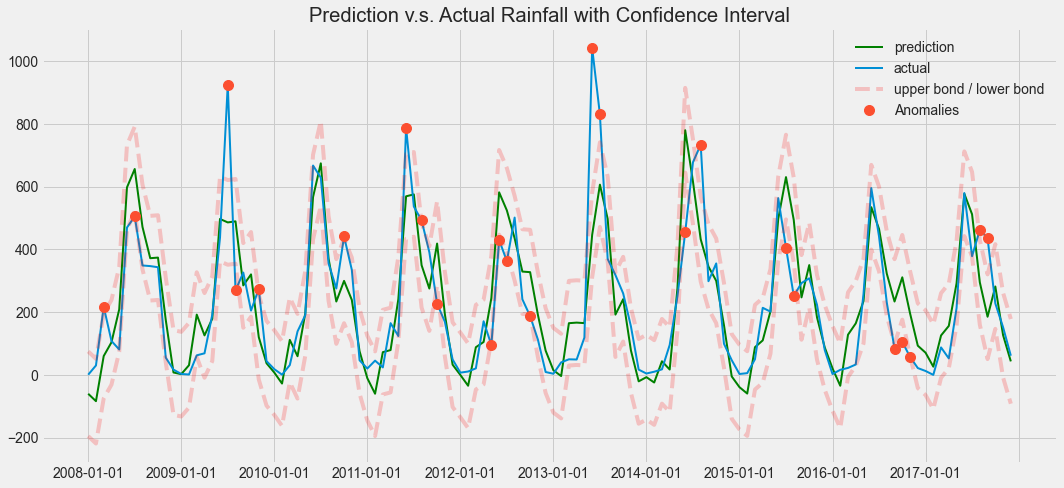

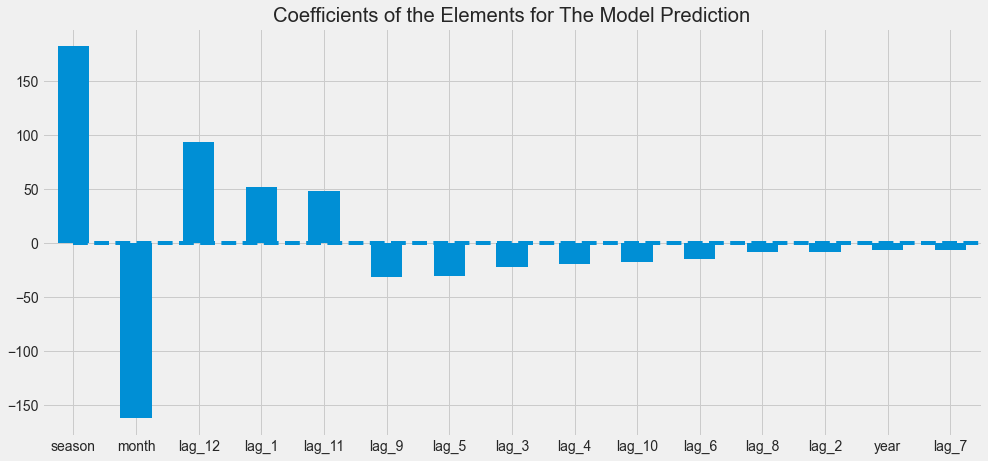

In [41]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True, plot_anomalies=True)
plotCoefficients(lr)

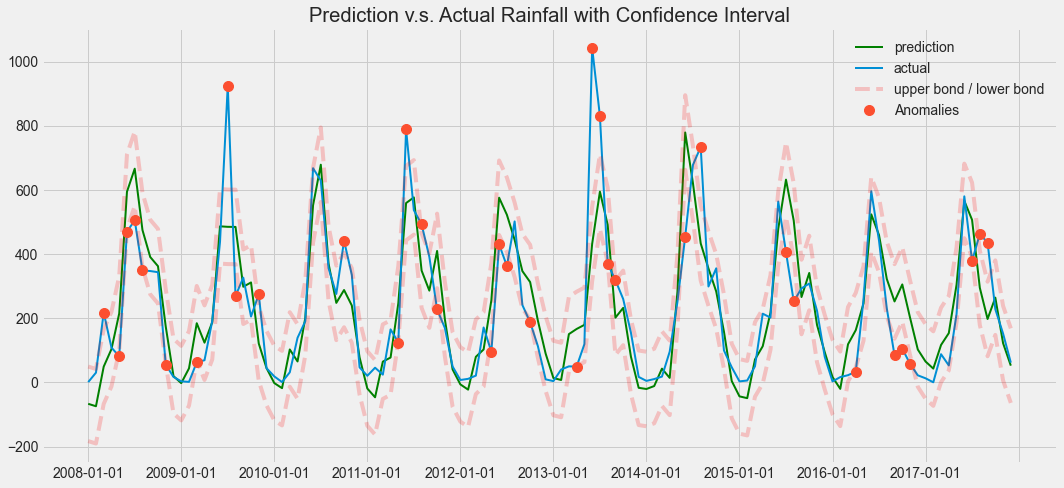

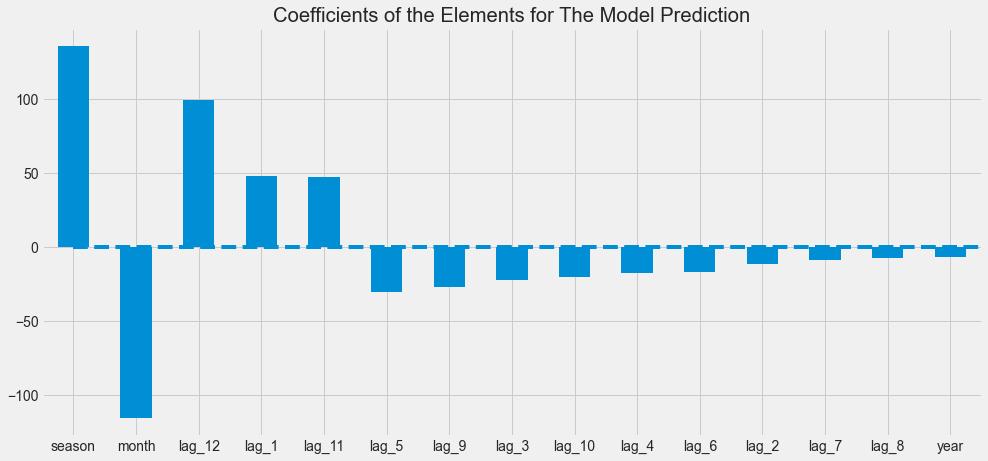

In [42]:
ridge = RidgeCV(cv=tscv)
ridge.fit(X_train_scaled, y_train)

plotModelResults(ridge, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(ridge)

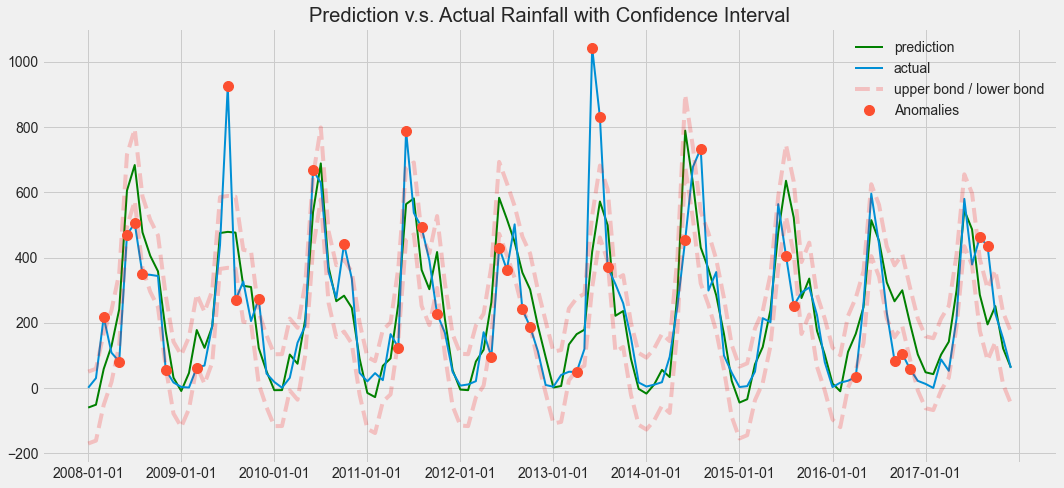

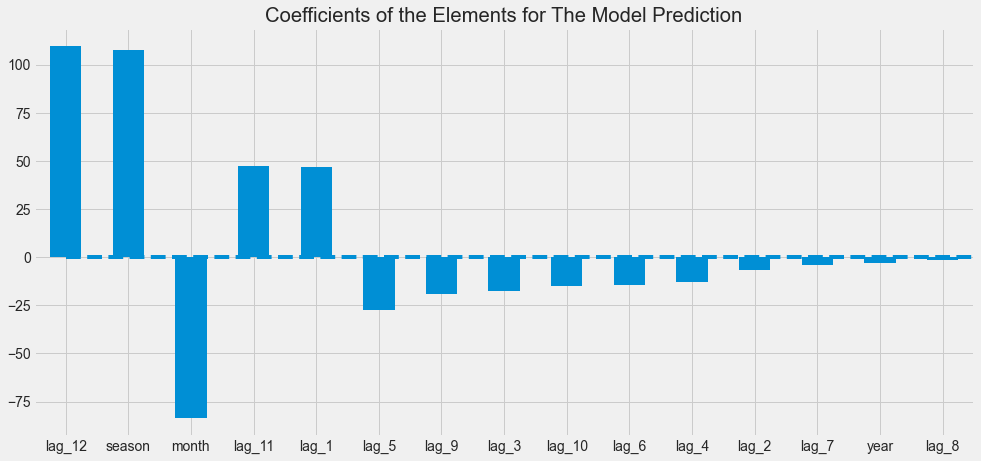

In [43]:
lasso = LassoCV(cv=tscv)
lasso.fit(X_train_scaled, y_train)

plotModelResults(lasso, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(lasso)

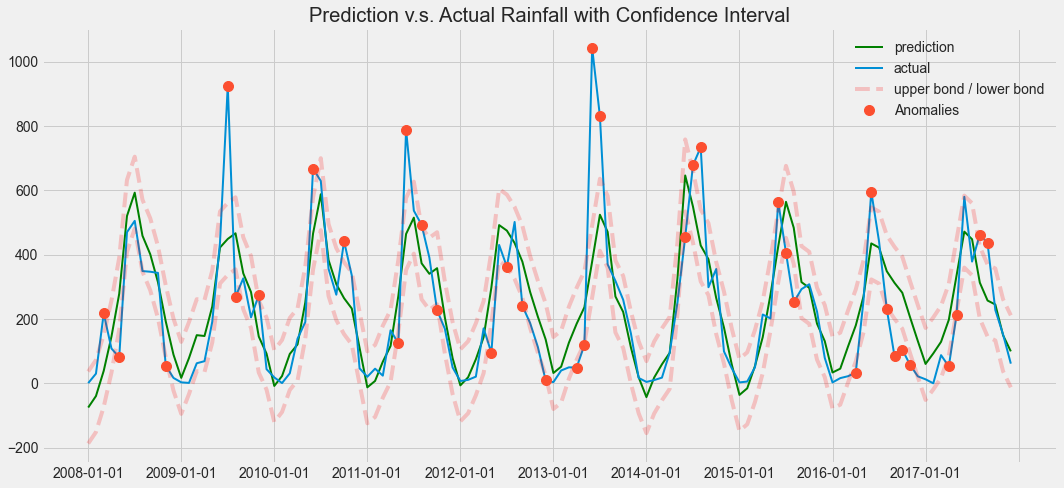

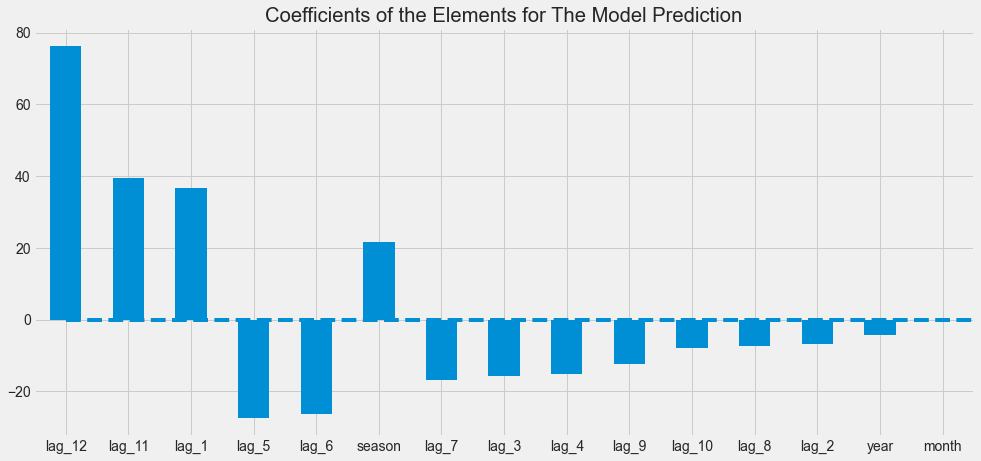

In [44]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(X_train_scaled, y_train)
plotModelResults(en, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(en)


In [45]:
def run_regression(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
    me = np.mean(y_pred - y_test)
    mae = np.mean(np.abs(y_pred - y_test))
    mpe = np.mean((y_pred - y_test)/y_test)
    rmse = np.mean((y_pred - y_test)**2)**.5
    corr = np.corrcoef(y_pred, y_test)[0,1]
    print('MAE:', mae)
    print('RMSE:', rmse)
    print('Correlation:', corr)
    
    return mape, me, mae, mpe, rmse, corr

In [47]:
#LinearRegression
print('\nLinearRegression:')
mape_lrs, me_lrs, mae_lrs, mpe_lrs, rmse_lrs, corr_lrs = run_regression(lr, X_train_scaled, y_train, X_test_scaled, y_test)

#Ridge
print('\nRidge:')
mape_rgs, me_rgs, mae_rgs, mpe_rgs, rmse_rgs, corr_rgs = run_regression(ridge, X_train_scaled, y_train, X_test_scaled, y_test)

#Lasso
print('\nLasso:')
mape_lss, me_lss, mae_lss, mpe_lss, rmse_lss, corr_lss = run_regression(lasso, X_train_scaled, y_train, X_test_scaled, y_test)

#ElasticNet
print('\nElasticNet:')
mape_ens, me_ens, mae_ens, mpe_ens, rmse_ens, corr_ens = run_regression(en, X_train_scaled, y_train, X_test_scaled, y_test)


LinearRegression:
MAE: 89.85005129525786
RMSE: 125.01612606155047
Correlation: 0.8320825973452788

Ridge:
MAE: 89.55546538390534
RMSE: 125.70124193595144
Correlation: 0.8294583400705923

Lasso:
MAE: 88.59224669183817
RMSE: 126.9045818988956
Correlation: 0.8258674830214655

ElasticNet:
MAE: 91.61320016592558
RMSE: 129.9085812842968
Correlation: 0.8148378584737324


In [3]:
linear_x = ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet'] 
linear_mae = [mae_lrs, mae_rgs, mae_lss, mae_ens]
linear_rmse = [rmse_lrs, rmse_rgs, rmse_lss, rmse_ens]

linear_mae = [round(num, 2) for num in linear_mae]
linear_rmse = [round(num, 2) for num in linear_rmse]

fig = go.Figure()
fig.add_trace(go.Bar(x=linear_x, y=linear_mae, name='MAE', 
                     marker_color='lightblue', text=linear_mae, 
                     textposition='auto'))
fig.add_trace(go.Bar(x=linear_x, y=linear_rmse, name='RMSE', 
                     marker_color='lightgreen', text=linear_rmse, 
                     textposition='auto'))
fig.update_layout(barmode='group', xaxis_tickangle=0)
fig.update_layout({'showlegend':True})
fig.update_xaxes(
        title_text = "Machine Learning Models",
        title_font = {"size": 16},
        title_standoff = 12)
fig.update_yaxes(
        title_text = "Errors",
        title_font = {"size": 16},
        title_standoff = 12)
fig.update_layout(title_text="MAE and RMSE to Evaluate the Prediction (The Lower, The Better)", 
                  title_x=0.5, title_y=0.88)
fig.show()

NameError: name 'mae_rgs' is not defined